In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.interpolate as spi
import matplotlib.ticker as ticker

In [36]:
from matplotlib import rcParams
#rcParams['font.family'] = 'serif'
D = 3
N = 1e8
true_nlist = [1.5, 2, 4, 8, 12, 16, 20, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [0.1, 0.5, 1.0]
sclist = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
L = 1.0
num_empty = 0
res_dir = 'nsc-finalgrid'
randix = 0
n_perms = 5

In [3]:
pctNumSeenZero_np = np.zeros((len(nlist), len(sclist), n_perms))


for scix, sc in enumerate(sclist):
    c = s / sc
    for nix, n in enumerate(nlist):
        for randix in range(0, n_perms):
            true_n = true_nlist[nix]
            fout = (
                f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'.csv')
            pctNumSeenZero_np[nix,scix, randix]  = ((res.NumberSeen == 0).sum()+0.01)/(res.shape[0]+0.02)
likratio = np.mean(pctNumSeenZero_np, axis=2)/ (1-np.mean(pctNumSeenZero_np,axis=2))

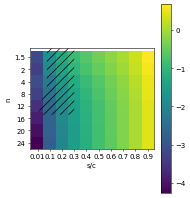

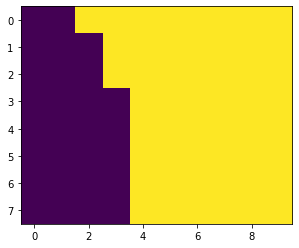

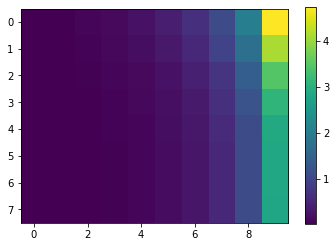

In [4]:
fig = plt.figure(figsize=(4,5),dpi=50)
plt.imshow(np.log10(likratio));
#cont = plt.contour(nlist, sclist, np.log10(likratio), colors='k');
plt.gca().set_yticks(list(range(len(nlist))))
plt.gca().set_yticklabels(true_nlist)
plt.gca().set_ylabel('n');
plt.gca().set_xticks(list(range(len(sclist))))
plt.gca().set_xticklabels(sclist)
plt.gca().set_xlabel('s/c');
plt.colorbar();
plt.contourf(likratio > 0.05, 1, hatches=['', '//'], origin='upper', colors='red',extent=(-0.85, 3.2, -1.1, 5.1), alpha=0)
#fig.savefig('figures-friday/plotS1.png');
plt.figure();
plt.imshow(likratio>0.05);
plt.figure();
plt.imshow(likratio);
plt.colorbar();

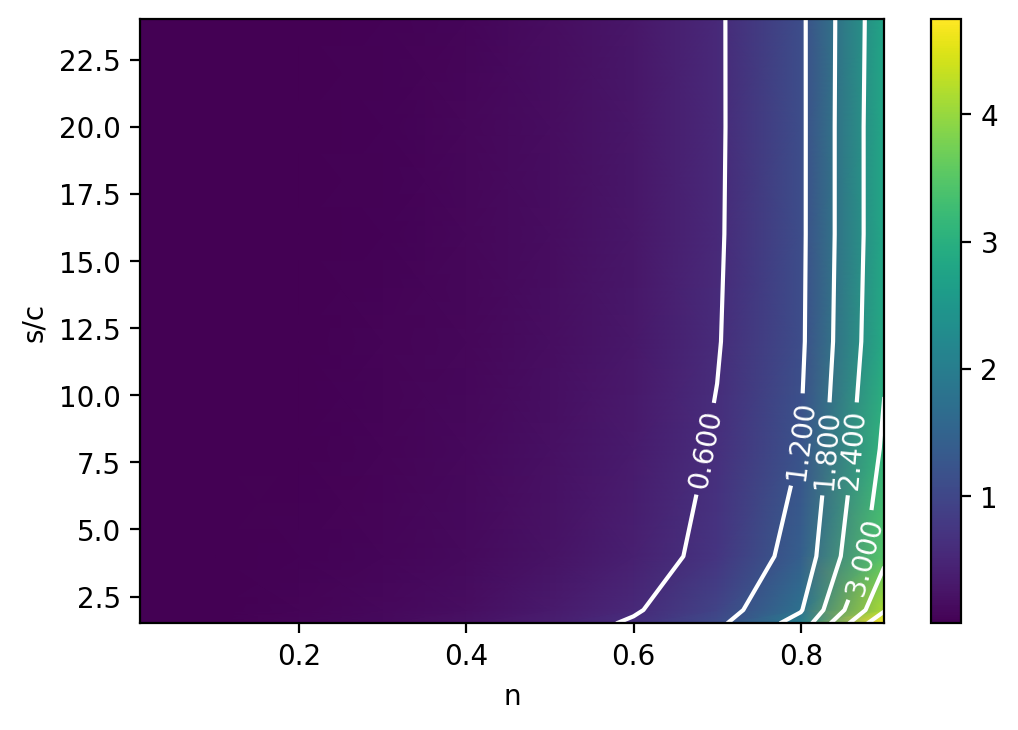

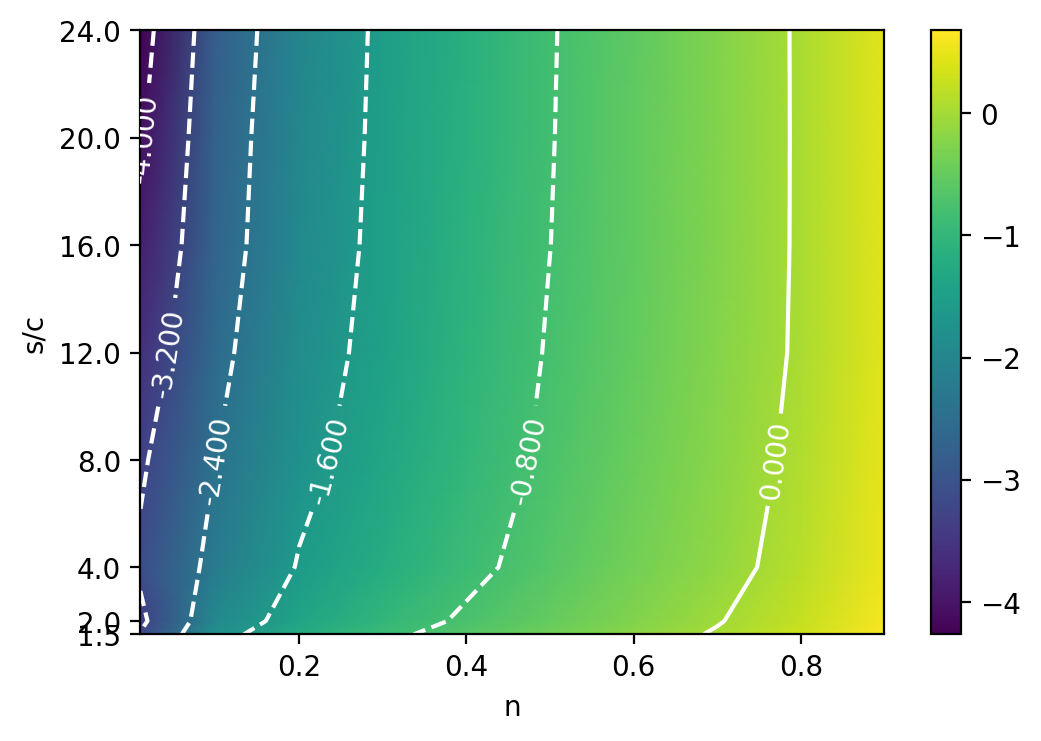

In [5]:
plt.figure(dpi=200)
plt.pcolormesh(sclist, true_nlist, likratio, shading='gouraud');
plt.colorbar();
cont = plt.contour(sclist, true_nlist, likratio, colors='white');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s/c');

plt.figure(dpi=200)
plt.pcolormesh(sclist, true_nlist, np.log10(likratio), shading='gouraud');
plt.colorbar();
cont = plt.contour(sclist, true_nlist, np.log10(likratio), colors='white');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.gca().set_yticks([1.5, 2, 4, 8, 12, 16, 20, 24]);
plt.xlabel('n');
plt.ylabel('s/c');

In [6]:
np.set_printoptions(precision=2, threshold=20)
pd.DataFrame(data=np.log10(likratio), index=true_nlist, columns=sclist) 

,0.01,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90
1.5,-3.161606,-1.779182,-1.250392,-0.898572,-0.633034,-0.402135,-0.185225,0.035594,0.309099,0.676276
2.0,-3.333601,-1.929795,-1.380956,-1.009693,-0.738882,-0.484326,-0.257006,-0.023173,0.243873,0.616442
4.0,-3.094861,-2.213524,-1.565106,-1.197288,-0.904254,-0.632269,-0.385306,-0.138211,0.151194,0.540196
8.0,-3.292476,-2.401967,-1.745225,-1.349560,-1.014678,-0.728294,-0.459491,-0.194843,0.082068,0.491885
12.0,-3.586481,-2.557592,-1.854279,-1.427929,-1.076676,-0.771814,-0.507873,-0.240191,0.046102,0.460792
16.0,-3.847405,-2.667171,-1.945444,-1.467368,-1.100077,-0.803019,-0.527843,-0.257331,0.039734,0.451454
20.0,-4.071886,-2.711105,-1.982672,-1.494004,-1.125519,-0.816340,-0.537539,-0.263837,0.039474,0.451616
24.0,-4.265224,-2.783369,-2.015534,-1.510119,-1.139763,-0.825139,-0.541027,-0.263361,0.040712,0.446616


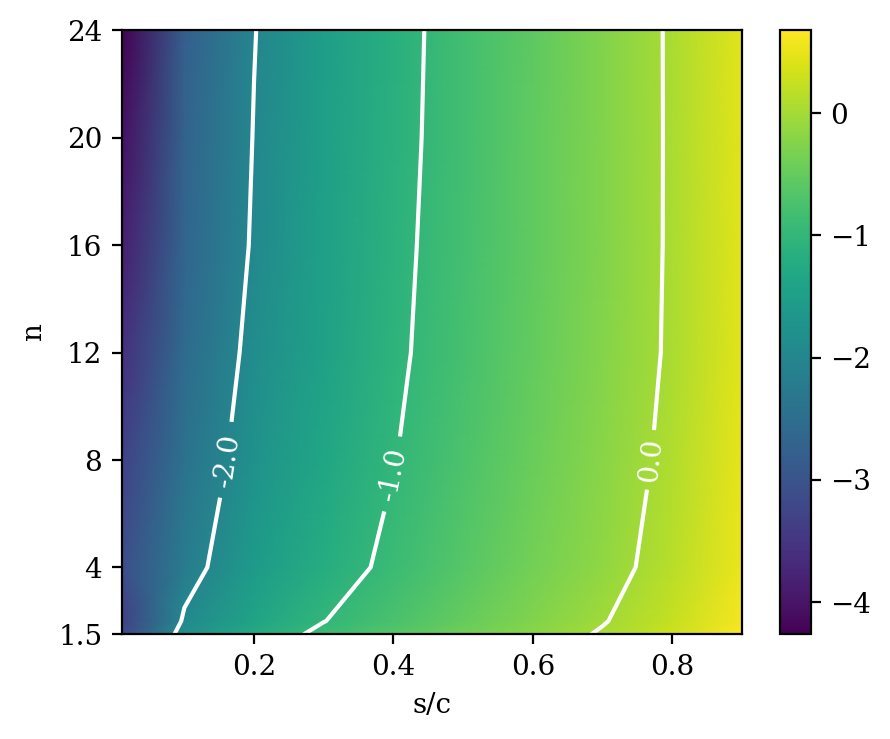

In [37]:
plt.figure(figsize=(5,4), dpi=200)
plt.pcolormesh(sclist, true_nlist, np.log10(likratio), shading='gouraud');
plt.colorbar();
cont = plt.contour(
    sclist, true_nlist, np.log10(likratio), 
    levels=[-2, -1, 0], colors='white', linestyles='solid');
plt.gca().clabel(cont, inline=1, fontsize=10, fmt='%1.1f');
plt.ylabel('n');
plt.xlabel('s/c');
plt.gca().set_yticks([1.5, 4, 8, 12, 16, 20, 24]);
plt.gca().set_yticklabels([1.5, 4, 8, 12, 16, 20, 24]);
plt.savefig('figures-friday/plotS1.png');

<ipython-input-35-b2f2904ef8a1>:18: MatplotlibDeprecationWarning: The 'subsy' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.gca().set_yscale('log', subsy=[2, 3, 4, 5, 6, 7, 8]);


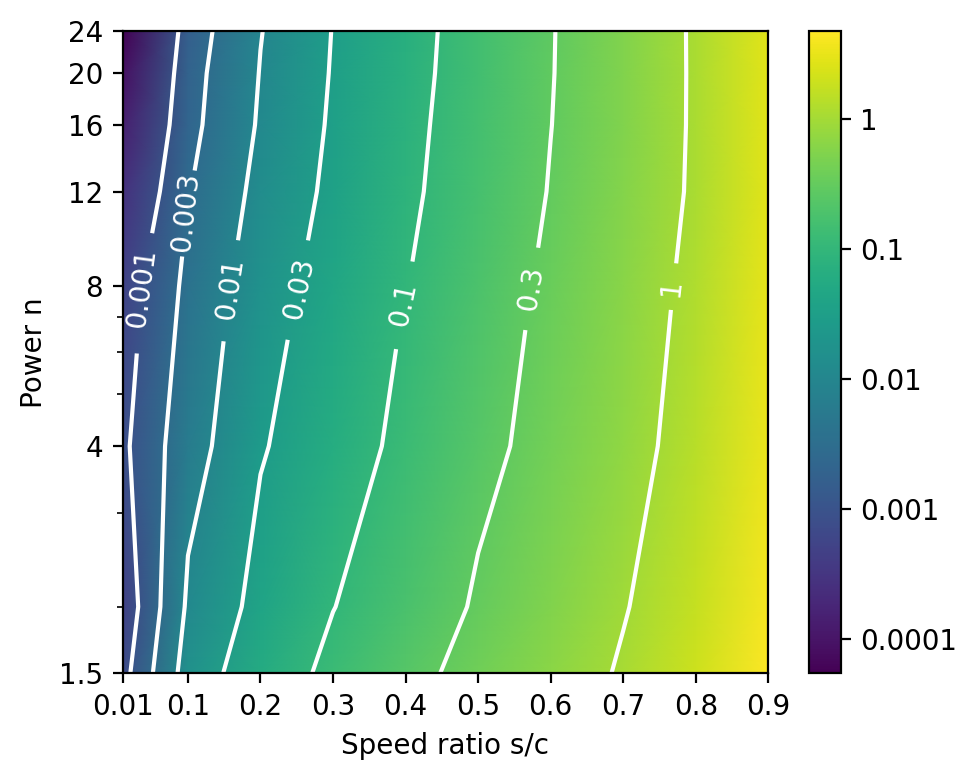

In [35]:
lrtlevels = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
axlrtlevels = [0.0001, 0.001, 0.01, 0.1, 1]
loglrtlevels = list(np.log10(lrtlevels))
logaxlrtlevels = list(np.log10(axlrtlevels))

plt.figure(figsize=(5,4), dpi=200)
plt.pcolormesh(sclist, true_nlist, np.log10(likratio), shading='gouraud');
cbar = plt.colorbar();
cbar.ax.get_yaxis().set_ticks(logaxlrtlevels);
cbar.ax.get_yaxis().set_ticklabels(axlrtlevels);
cont = plt.contour(
    sclist, true_nlist, np.log10(likratio), 
    levels=loglrtlevels, colors='white', linestyles='solid');
cont.levels = [f'{val} ' for val in lrtlevels]
plt.gca().clabel(cont, cont.levels, inline=1, fontsize=10, fmt='%1.1f');
plt.ylabel('Power n');
plt.xlabel('Speed ratio s/c');
plt.gca().set_yscale('log', subsy=[2, 3, 4, 5, 6, 7, 8]);
plt.gca().set_yticks([1.5, 4, 8, 12, 16, 20, 24]);
plt.gca().set_yticklabels([1.5, 4, 8, 12, 16, 20, 24]);
plt.gca().set_xticks(sclist);
plt.gca().set_xticklabels([f'{val}' for val in sclist]);
plt.tight_layout();
plt.savefig('figures-friday/plotS1-logn.png');